### MC Simulation BlackJack State-Value
---
- dealer policy: HIT17
- player policy: sticks on 20 or 21, otherwise hit
---
**States:** player's current sum(12–21), the dealer’s one showing card (ace–10), player's usable ace

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
class BlackJackMC(object):
    
    def __init__(self):
        self.player_state_value = {}
        self.player_states = []
        self.player_win = 0
        self.player_draw = 0
    
    # give card
    @staticmethod
    def giveCard():
        # 1 stands for ace
        c_list = list(range(1, 11)) + [10, 10, 10]
        return np.random.choice(c_list)
    
    def dealerPolicy(self, current_value, usable_ace, is_end):
        if current_value > 21:
            if usable_ace:
                current_value -= 10
                usable_ace = False
            else:
                return current_value, usable_ace, True
        # HIT17
        if current_value >= 17:
            return current_value, usable_ace, True
        else:
            card = self.giveCard()
            if card == 1:
                if current_value <= 10:
                    return current_value+11, True, False
                return current_value+1, usable_ace, False
            else:
                return current_value+card, usable_ace, False
            
    # one can only has 1 usable ace               
    def playerPolicy(self, current_value, usable_ace, is_end):
        if current_value > 21:
            if usable_ace:
                current_value -= 10
                usable_ace = False
            else:
                return current_value, usable_ace, True
        # HIT20
        if current_value >= 20:
            return current_value, usable_ace, True
        else:
            card = self.giveCard()
            if card == 1:
                if current_value <= 10:
                    return current_value+11, True, False
                return current_value+1, usable_ace, False
            else:
                return current_value+card, usable_ace, False
    
    def _giveCredit(self, player_value, dealer_value, is_end=True):
        if is_end:
            # give reward only to last state
            last_state = self.player_states[-1]
            if player_value > 21:
                if dealer_value > 21:
                    # draw
                    self.player_draw += 1
                else:
                    self.player_state_value[last_state] -= 1
            else:
                if dealer_value > 21:
                    self.player_state_value[last_state] += 1
                    self.player_win += 1
                else:
                    if player_value < dealer_value:
                        self.player_state_value[last_state] -= 1
                    elif player_value > dealer_value:
                        self.player_state_value[last_state] += 1
                        self.player_win += 1
                    else:
                        # draw
                        self.player_draw += 1
      
    
    def play(self, rounds=1000):
        ##Read the algorithm carefully and write the code
        """"
        Step:1 Loop for rounds times and print the round number every 1000 iterations.
        Step:2 Initialize dealer_value, player_value, and show_card to 0.
        Step:3 Draw the dealer’s first card, assign it to show_card, and draw the second card to update dealer_value.
        Step:4 Initialize usable_ace and is_end as False and start the player’s turn.
        Step:5 Continuously apply playerPolicy until is_end becomes True.
        Step:6 If player_value is between 12 and 21, record the state as (player_value, show_card, usable_ace).
        Step:7 Initialize usable_ace and is_end as False and start the dealer’s turn.
        Step:8 Continuously apply dealerPolicy until is_end becomes True.
        Step:9 Iterate through self.player_states, setting uninitialized states in self.player_state_value to 0.
        Step:10 Call _giveCredit to determine the winner and update rewards."""
        for i in range(rounds):
            if (i + 1) % 1000 == 0:
                print(f"Round {i + 1}")
            
            # Clear player states for this round
            self.player_states = []
            
            # Initialize dealer's cards
            show_card = self.giveCard()  # First card (shown to player)
            dealer_card2 = self.giveCard()  # Second card (hidden)
            
            # Process dealer's initial cards
            dealer_usable_ace = False
            if show_card == 1:  # First card is Ace
                dealer_value = 11
                dealer_usable_ace = True
            else:
                dealer_value = show_card
                
            if dealer_card2 == 1:  # Second card is Ace
                if dealer_value <= 10:  # Can use as 11 without busting
                    dealer_value += 11
                    dealer_usable_ace = True
                else:
                    dealer_value += 1
            else:
                dealer_value += dealer_card2
                
            # Initialize player's cards
            player_card1 = self.giveCard()
            player_card2 = self.giveCard()
            
            # Process player's initial cards
            player_usable_ace = False
            if player_card1 == 1:  # First card is Ace
                player_value = 11
                player_usable_ace = True
            else:
                player_value = player_card1
                
            if player_card2 == 1:  # Second card is Ace
                if player_value <= 10:  # Can use as 11 without busting
                    player_value += 11
                    player_usable_ace = True
                else:
                    player_value += 1
            else:
                player_value += player_card2
                
            # Player's turn
            is_end = False
            while not is_end:
                # Record state if value is 12-21
                if 12 <= player_value <= 21:
                    state = (player_value, show_card, player_usable_ace)
                    self.player_states.append(state)
                    
                player_value, player_usable_ace, is_end = self.playerPolicy(
                    player_value, player_usable_ace, is_end
                )
            
            # Dealer's turn
            is_end = False
            while not is_end:
                dealer_value, dealer_usable_ace, is_end = self.dealerPolicy(
                    dealer_value, dealer_usable_ace, is_end
                )
            
            # Initialize values for states encountered
            for state in self.player_states:
                if state not in self.player_state_value:
                    self.player_state_value[state] = 0
                    
            # Determine winner and update rewards
            self._giveCredit(player_value, dealer_value)

In [4]:
b = BlackJackMC()
b.play(10000)

Round 1000
Round 2000
Round 3000
Round 4000
Round 5000
Round 6000
Round 7000
Round 8000
Round 9000
Round 10000


In [5]:
print("Player wining rate", b.player_win/10000)
print("Not losing rate", (b.player_win+b.player_draw)/10000)

Player wining rate 0.2842
Not losing rate 0.5198


#### Plots

Text(0.5, 0, 'reward')

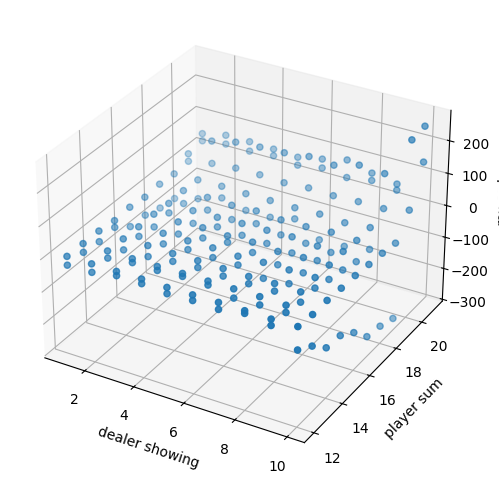

In [6]:
fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(111, projection='3d')

x = [k[1] for k in b.player_state_value.keys()]
y = [k[0] for k in b.player_state_value.keys()]
z = [v for v in b.player_state_value.values()]
ax.scatter(x, y, z)

ax.set_xlabel("dealer showing")
ax.set_ylabel("player sum")
ax.set_zlabel("reward")

In [7]:
usable_ace = {}
nonusable_ace = {}

for k, v in b.player_state_value.items():
    if k[2]:
        usable_ace[k] = v
    else:
        nonusable_ace[k] = v

Text(0.5, 0, 'reward')

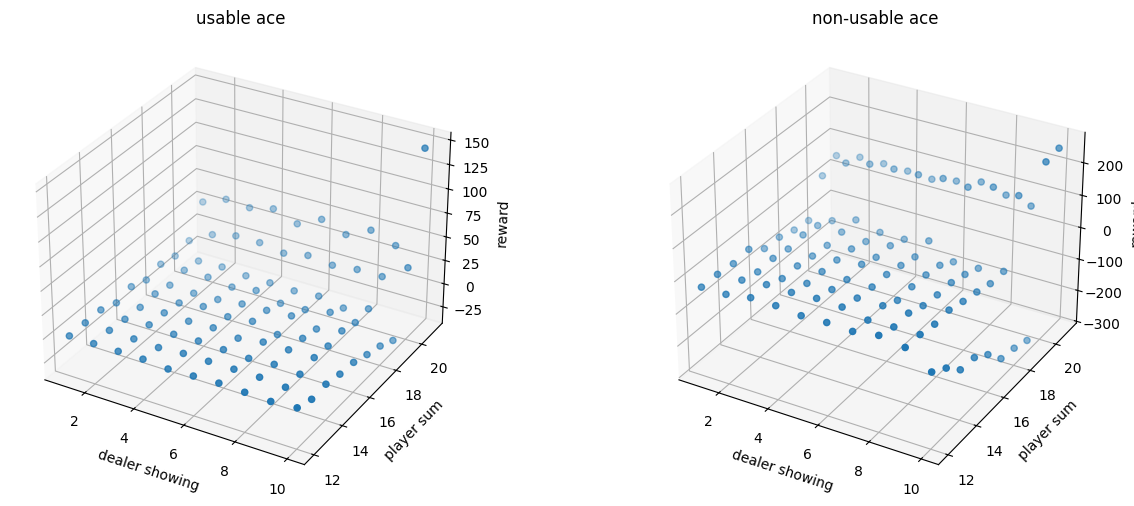

In [8]:
fig = plt.figure(figsize=[15, 6])

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

x1 = [k[1] for k in usable_ace.keys()]
y1 = [k[0] for k in usable_ace.keys()]
z1 = [v for v in usable_ace.values()]
ax1.scatter(x1, y1, z1)

ax1.set_title("usable ace")
ax1.set_xlabel("dealer showing")
ax1.set_ylabel("player sum")
ax1.set_zlabel("reward")

x2 = [k[1] for k in nonusable_ace.keys()]
y2 = [k[0] for k in nonusable_ace.keys()]
z2 = [v for v in nonusable_ace.values()]
ax2.scatter(x2, y2, z2)

ax2.set_title("non-usable ace")
ax2.set_xlabel("dealer showing")
ax2.set_ylabel("player sum")
ax2.set_zlabel("reward")

In [9]:
b.player_state_value.get((18, 10, False))

-251

In [10]:
b.player_state_value.get((18, 5, False))

-42